# Feature engineering


## Arithmetical features
To practice creating new features, you will be working with a subsample from the Kaggle competition called "House Prices: Advanced Regression Techniques". The goal of this competition is to predict the price of the house based on its properties. It's a regression problem with Root Mean Squared Error as an evaluation metric.

Your goal is to create new features and determine whether they improve your validation score. To get the validation score from 5-fold cross-validation, you're given the get_kfold_rmse() function. Use it with the train DataFrame, available in your workspace, as an argument.

### init

In [18]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(train)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'train.csv': 'https://file.io/orY3lR'}}
"""
prefixToc='1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
train = pd.read_csv(prefix+'train.csv',index_col=0)

Téléchargements déjà effectués - SKIP


In [19]:
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
import inspect
print_func(get_kfold_rmse)
"""
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Import KFold
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=123)


def get_kfold_rmse(train):
    mse_scores = []

    for train_index, test_index in kf.split(train):
        train = train.fillna(0)
        feats = [x for x in train.columns if x not in ['Id', 'SalePrice', 'RoofStyle', 'CentralAir']]
        
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, min_samples_split=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[feats], y=fold_train['SalePrice'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[feats])
    
        fold_score = mean_squared_error(fold_test['SalePrice'], pred)
        mse_scores.append(np.sqrt(fold_score))
        
    return round(np.mean(mse_scores) + np.std(mse_scores), 2)


### code

In [20]:
train.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,FirstFlrSF,SecondFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,8450,7,2003,Gable,856,Y,856,854,2,1,3,1,8,2,548,208500
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,0,3,1,6,2,460,181500
2,3,11250,7,2001,Gable,920,Y,920,866,2,1,3,1,6,2,608,223500
3,4,9550,7,1915,Gable,756,Y,961,756,1,0,3,1,7,3,642,140000
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,1,4,1,9,3,836,250000


In [21]:
# Look at the initial RMSE
print('RMSE before feature engineering:', get_kfold_rmse(train))

# Find the total area of the house
train['TotalArea'] = train['TotalBsmtSF'] + train['FirstFlrSF'] + train['SecondFlrSF']
print('RMSE with total area:', get_kfold_rmse(train))

# Find the area of the garden
train['GardenArea'] = train['LotArea'] - train['FirstFlrSF']
print('RMSE with garden area:', get_kfold_rmse(train))

# Find total number of bathrooms
train['TotalBath'] = train.FullBath + train.HalfBath
print('RMSE with number of bathrooms:', get_kfold_rmse(train))

RMSE before feature engineering: 36029.39
RMSE with total area: 35073.2
RMSE with garden area: 34413.55
RMSE with number of bathrooms: 34506.78


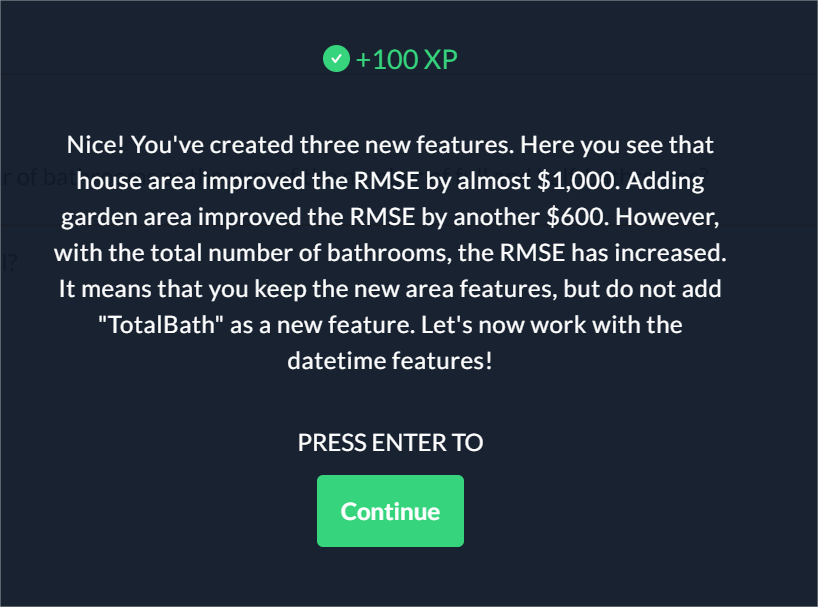

## Date features
You've built some basic features using numerical variables. Now, it's time to create features based on date and time. You will practice on a subsample from the Taxi Fare Prediction Kaggle competition data. The data represents information about the taxi rides and the goal is to predict the price for each ride.

Your objective is to generate date features from the pickup datetime. Recall that it's better to create new features for train and test data simultaneously. After the features are created, split the data back into the train and test DataFrames. Here it's done using pandas' isin() method.

The train and test DataFrames are already available in your workspace.

### init

In [22]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(test, train)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'test.csv': 'https://file.io/Ioh67j',
  'train.csv': 'https://file.io/gdN8Tn'}}
"""
prefixToc='1.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
test = pd.read_csv(prefix+'test.csv',index_col=0)
train = pd.read_csv(prefix+'train.csv',index_col=0)



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'test.csv': 'https://file.io/Ioh67j', 'train.csv': 'https://file.io/gdN8Tn'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  396k    0  396k    0     0   236k      0 --:--:--  0:00:01 --:--:--  236k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  416k    0  416k    0     0   479k      0 --:--:-- --:--:-- --:--:--  479k



### code

In [23]:
# Concatenate train and test together
taxi = pd.concat([train, test])

# Convert pickup date to datetime object
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])

# Create a day of week feature
taxi['dayofweek'] = taxi['pickup_datetime'].dt.dayofweek

# Create an hour feature
taxi['hour'] = taxi['pickup_datetime'].dt.hour

# Split back into train and test
new_train = taxi[taxi['id'].isin(train['id'])]
new_test = taxi[taxi['id'].isin(test['id'])]

<ipython-input-23-2752c1b2d046>:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  taxi = pd.concat([train, test])


# Categorical features


## Label encoding
Let's work on categorical variables encoding. You will again work with a subsample from the House Prices Kaggle competition.

Your objective is to encode categorical features "RoofStyle" and "CentralAir" using label encoding. The train and test DataFrames are already available in your workspace.

### init

In [24]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(test, train)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'test.csv': 'https://file.io/KPgMtP',
  'train.csv': 'https://file.io/ZFCEuR'}}
"""
prefixToc='2.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
test = pd.read_csv(prefix+'test.csv',index_col=0)
train = pd.read_csv(prefix+'train.csv',index_col=0)



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'test.csv': 'https://file.io/KPgMtP', 'train.csv': 'https://file.io/ZFCEuR'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92378    0 92378    0     0   118k      0 --:--:-- --:--:-- --:--:--  118k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92753    0 92753    0     0  37904      0 --:--:--  0:00:02 --:--:-- 37920



### code

In [25]:
train.head()

,Id,LotArea,OverallQual,YearBuilt,RoofStyle,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,8450,7,2003,Gable,856,Y,856,854,2,1,3,1,8,2,548,208500
1,2,9600,6,1976,Gable,1262,Y,1262,0,2,0,3,1,6,2,460,181500
2,3,11250,7,2001,Gable,920,Y,920,866,2,1,3,1,6,2,608,223500
3,4,9550,7,1915,Gable,756,Y,961,756,1,0,3,1,7,3,642,140000
4,5,14260,8,2000,Gable,1145,Y,1145,1053,2,1,4,1,9,3,836,250000


In [26]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create new features
houses['RoofStyle_enc'] = le.fit_transform(houses['RoofStyle'])
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Look at new features
print(houses[['RoofStyle', 'RoofStyle_enc', 'CentralAir', 'CentralAir_enc']].head())

  RoofStyle  RoofStyle_enc CentralAir  CentralAir_enc
0     Gable              1          Y               1
1     Gable              1          Y               1
2     Gable              1          Y               1
3     Gable              1          Y               1
4     Gable              1          Y               1


<ipython-input-26-a139737d5fad>:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  houses = pd.concat([train, test])


## One-Hot encoding
The problem with label encoding is that it implicitly assumes that there is a ranking dependency between the categories. So, let's change the encoding method for the features "RoofStyle" and "CentralAir" to one-hot encoding. Again, the train and test DataFrames from House Prices Kaggle competition are already available in your workspace.

Recall that if you're dealing with binary features (categorical features with only two categories) it is suggested to apply label encoder only.

Your goal is to determine which of the mentioned features is not binary, and to apply one-hot encoding only to this one.

### init

In [27]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(test, train)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'test.csv': 'https://file.io/exrQT0',
  'train.csv': 'https://file.io/pujiEx'}}
"""
prefixToc='2.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
test = pd.read_csv(prefix+'test.csv',index_col=0)
train = pd.read_csv(prefix+'train.csv',index_col=0)



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'test.csv': 'https://file.io/exrQT0', 'train.csv': 'https://file.io/pujiEx'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92378    0 92378    0     0   118k      0 --:--:-- --:--:-- --:--:--  118k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92753    0 92753    0     0  34843      0 --:--:--  0:00:02 --:--:-- 34856



### code

In [28]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Look at feature distributions
print(houses['RoofStyle'].value_counts(), '\n')
print(houses['CentralAir'].value_counts())

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64 

Y    2723
N     196
Name: CentralAir, dtype: int64


<ipython-input-28-f2eb1cc1d4d1>:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  houses = pd.concat([train, test])


In [29]:
# Label encode binary 'CentralAir' feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])


In [30]:
# Create One-Hot encoded features
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')

# Concatenate OHE features to houses
houses = pd.concat([houses, ohe], axis=1)

# Look at OHE features
print(houses[[col for col in houses.columns if 'RoofStyle' in col]].head(3))

  RoofStyle  RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  \
0     Gable               0                1                  0   
1     Gable               0                1                  0   
2     Gable               0                1                  0   

   RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  
0              0                  0               0  
1              0                  0               0  
2              0                  0               0  


# Target encoding


## Mean target encoding
First of all, you will create a function that implements mean target encoding. Remember that you need to develop the two following steps:

- Calculate the mean on the train, apply to the test
- Split train into K folds. Calculate the out-of-fold mean for each fold, apply to this particular fold

Each of these steps will be implemented in a separate function: test_mean_target_encoding() and train_mean_target_encoding(), respectively.

The final function mean_target_encoding() takes as arguments: the train and test DataFrames, the name of the categorical column to be encoded, the name of the target column and a smoothing parameter alpha. It returns two values: a new feature for train and test DataFrames, respectively.

### code

In [31]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [32]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

In [33]:
def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

## K-fold cross-validation
You will work with a binary classification problem on a subsample from Kaggle playground competition. The objective of this competition is to predict whether a famous basketball player Kobe Bryant scored a basket or missed a particular shot.

Train data is available in your workspace as bryant_shots DataFrame. It contains data on 10,000 shots with its properties and a target variable "shot\_made\_flag" -- whether shot was scored or not.

One of the features in the data is "game_id" -- a particular game where the shot was made. There are 541 distinct games. So, you deal with a high-cardinality categorical feature. Let's encode it using a target mean!

Suppose you're using 5-fold cross-validation and want to evaluate a mean target encoded feature on the local validation.

### init

In [34]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(bryant_shots)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'bryant_shots.csv': 'https://file.io/owOxZS'}}
"""
prefixToc='3.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
bryant_shots = pd.read_csv(prefix+'bryant_shots.csv',index_col=0)



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'bryant_shots.csv': 'https://file.io/owOxZS'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  691k    0  691k    0     0   369k      0 --:--:--  0:00:01 --:--:--  369k



### code

In [35]:
# Create 5-fold cross-validation
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# For each folds split
for train_index, test_index in kf.split(bryant_shots):
    cv_train, cv_test = bryant_shots.iloc[train_index], bryant_shots.iloc[test_index]

    # Create mean target encoded feature
    cv_train['game_id_enc'], cv_test['game_id_enc'] = mean_target_encoding(train=cv_train,
                                                                           test=cv_test,
                                                                           target='shot_made_flag',
                                                                           categorical='game_id',
                                                                           alpha=5)
    # Look at the encoding
    print(cv_train[['game_id', 'shot_made_flag', 'game_id_enc']].sample(n=1))

       game_id  shot_made_flag  game_id_enc
3135  20200372             0.0     0.374893
       game_id  shot_made_flag  game_id_enc
9036  20600847             0.0     0.361372
       game_id  shot_made_flag  game_id_enc
8882  20600735             1.0     0.479119
       game_id  shot_made_flag  game_id_enc
7363  20500709             0.0     0.328577
       game_id  shot_made_flag  game_id_enc
5780  20400494             1.0     0.445871


<ipython-input-35-11a80793ef54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_train['game_id_enc'], cv_test['game_id_enc'] = mean_target_encoding(train=cv_train,


## Beyond binary classification
Of course, binary classification is just a single special case. Target encoding could be applied to any target variable type:

- For binary classification usually mean target encoding is used
- For regression mean could be changed to median, quartiles, etc.
- For multi-class classification with N classes we create N features with target mean for each category in one vs. all fashion
The mean_target_encoding() function you've created could be used for any target type specified above. Let's apply it for the regression problem on the example of House Prices Kaggle competition.

Your goal is to encode a categorical feature "RoofStyle" using mean target encoding. The train and test DataFrames are already available in your workspace.

### init

In [36]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(test, train)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'test.csv': 'https://file.io/IHUfQ5',
  'train.csv': 'https://file.io/YNKORE'}}
"""
prefixToc='3.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
test = pd.read_csv(prefix+'test.csv',index_col=0)
train = pd.read_csv(prefix+'train.csv',index_col=0)



Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'test.csv': 'https://file.io/IHUfQ5', 'train.csv': 'https://file.io/YNKORE'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92378    0 92378    0     0  93311      0 --:--:-- --:--:-- --:--:-- 93216

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92753    0 92753    0     0   195k      0 --:--:-- --:--:-- --:--:--  195k



### code

In [37]:
# Create mean target encoded feature
train['RoofStyle_enc'], test['RoofStyle_enc'] = mean_target_encoding(train=train,
                                                                     test=test,
                                                                     target='SalePrice',
                                                                     categorical='RoofStyle',
                                                                     alpha=10)

# Look at the encoding
print(test[['RoofStyle', 'RoofStyle_enc']].drop_duplicates())

     RoofStyle  RoofStyle_enc
0        Gable  171565.947836
1          Hip  217594.645131
98     Gambrel  164152.950424
133       Flat  188703.563431
362    Mansard  180775.938759
1053      Shed  188267.663242


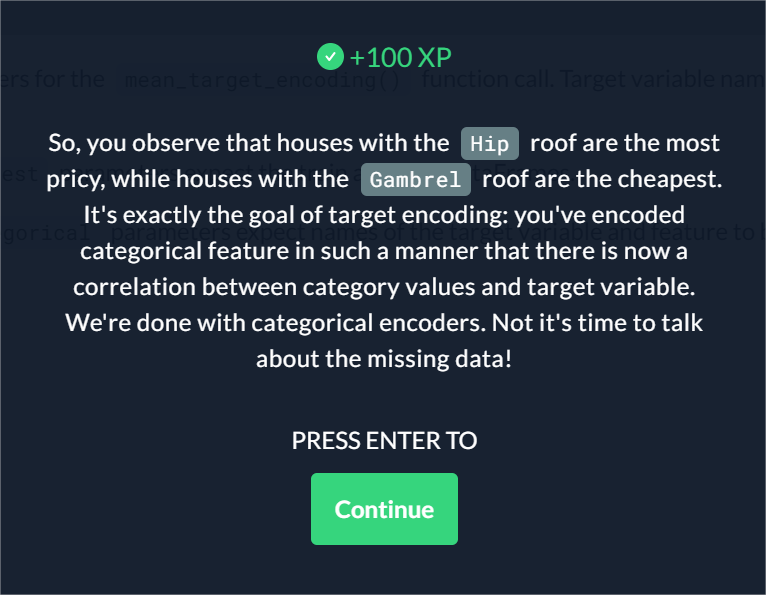